In [97]:
from sklearn.cluster import SpectralClustering
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure
from adjustText import adjust_text

In [98]:
df1 = pd.read_csv('Data _instance_from_Firefox.csv')
df2 = pd.read_csv('Data_Instance_Made_from_Notepad.csv')
df1.columns = ['from', 'to', 'weight']
df2.columns = ['from', 'to', 'weight']

5

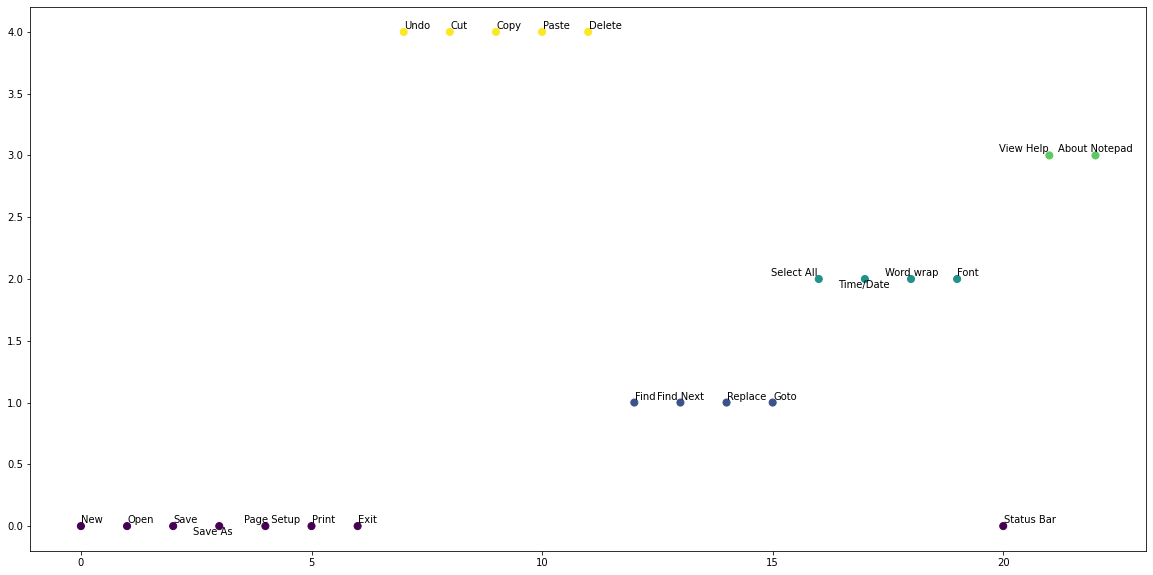

In [116]:
'''Graph creation and initialization'''
# default edge weight=1
G=nx.from_pandas_edgelist(df2, 'from', 'to', ['weight'])

'''Matrix creation'''
adj_matrix = nx.to_numpy_matrix(G) #Converts graph to an adj matrix with adj_matrix[i][j] represents weight between node i,j.
nodes_list = list(G.nodes()) #returns a list of nodes with index mapping with the a 
number_of_nodes = len(nodes_list)
nodes_list_index = list(range(number_of_nodes))
n_clusters = int(np.ceil(np.log2(number_of_nodes)))

'''Spectral Clustering'''
clusters = SpectralClustering(affinity = 'precomputed', assign_labels="discretize",random_state=5,n_clusters=n_clusters).fit_predict(adj_matrix)


'''Figure'''
figure = plt.gcf() # get current figure
figure.set_size_inches(20, 10)
plt.scatter(nodes_list_index,clusters,c=clusters, s=50, cmap='viridis')
texts = [plt.text(nodes_list_index[i], clusters[i], txt , ha='center', va='center') for i, txt in enumerate(nodes_list)]
adjust_text(texts) #adjusting annotations